In [20]:
# Preprocessing images and labels for training
# Author: Chengchao Xu
# Date: 2025-03-11

# virtual environment: mini-proj
# "conda activate mini-proj"

# libraries
import os
import numpy as np
from skimage import feature, io, color, exposure, filters
import matplotlib.pyplot as plt


In [21]:
# TODO: change the image path
# change folder name and file name
# Change folder name and file name
image_dir = os.path.join('..', 'image_files', 'AG103-A')  # Use os.path.join for proper path separators
image_filename = 'AG103-A-50K-002'

# Create input path
test_filepath = os.path.join(image_dir, image_filename +'.tif')

Original image shape: (960, 1500)
Saved test image to: ..\image_files\AG103-A\AG103-A-50K-002_test.tif


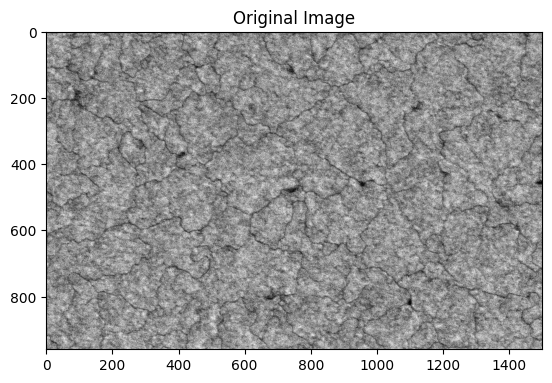

In [22]:
# Load and preprocess image
test_image = io.imread(test_filepath)

test_image = test_image[0:960, 0:1500]
# Convert to grayscale if necessary
if len(test_image.shape) > 2:
    test_image = color.rgb2gray(test_image)
print(f"Original image shape: {test_image.shape}")

# display the image
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')

# Create output filename for the test image
test_filename = image_filename + '_test.tif'
# Create complete output path
output_path = os.path.join(image_dir, test_filename)

# Save the test image
io.imsave(output_path, test_image.astype(np.uint8))
print(f"Saved test image to: {output_path}")


In [23]:
from skimage.morphology import disk, ball, square, erosion, dilation, opening, closing
from scipy import ndimage

# OPTIONAL
# Create a structuring element for background estimation
# Adjust the size based on your image features - must be larger than your features of interest
# selem_size = 50  # Try adjusting this value
# selem = disk(selem_size)

# # Estimate background using morphological operations
# # Opening operation (erosion followed by dilation) removes small objects
# background = opening(test_image, selem)

# # Subtract the background to get a flattened image
# corrected_image = test_image - background


Text(0.5, 1.0, 'Processed Image')

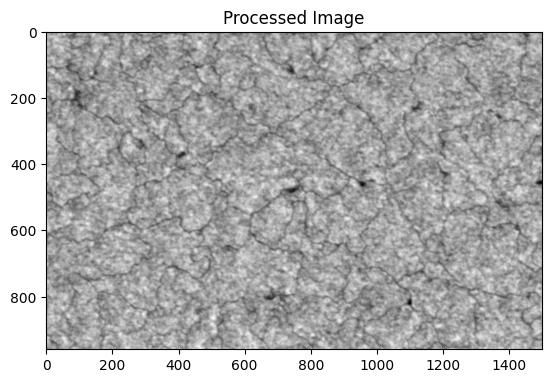

In [24]:

# # Normalize to 0-1 range
# image_flattened = (corrected_image - corrected_image.min()) / (corrected_image.max() - corrected_image.min())
# # Enhance contrast of the result
# image_corrected =  exposure.equalize_adapthist(image_flattened, clip_limit= 0.004)

image_corrected = test_image
image_denoised = filters.gaussian(image_corrected, sigma=2)

# Display the processed image
image_processed = image_denoised
plt.figure()
plt.imshow(image_processed, cmap='gray')
plt.title('Processed Image')


In [25]:

# Set scale factor, measured using imageJ
SCALE_FACTOR = 0.603 # pixel/nm

# skimage feature extraction
features = feature.multiscale_basic_features(
    image=image_processed,
    intensity=True,
    texture=True,
    edges=True,
    sigma_min=1,
    sigma_max=10,
    channel_axis=None # no color channel
)
print(f"Feature shape: {features.shape}")

Feature shape: (960, 1500, 16)


In [26]:


from joblib import load
# load the classifier
pixel_classifier = load('simple_pixel_classifier.joblib')
# predict the labels
X = features.reshape(-1, features.shape[2])
predicted_labels = pixel_classifier.predict(X).reshape(image_processed.shape)


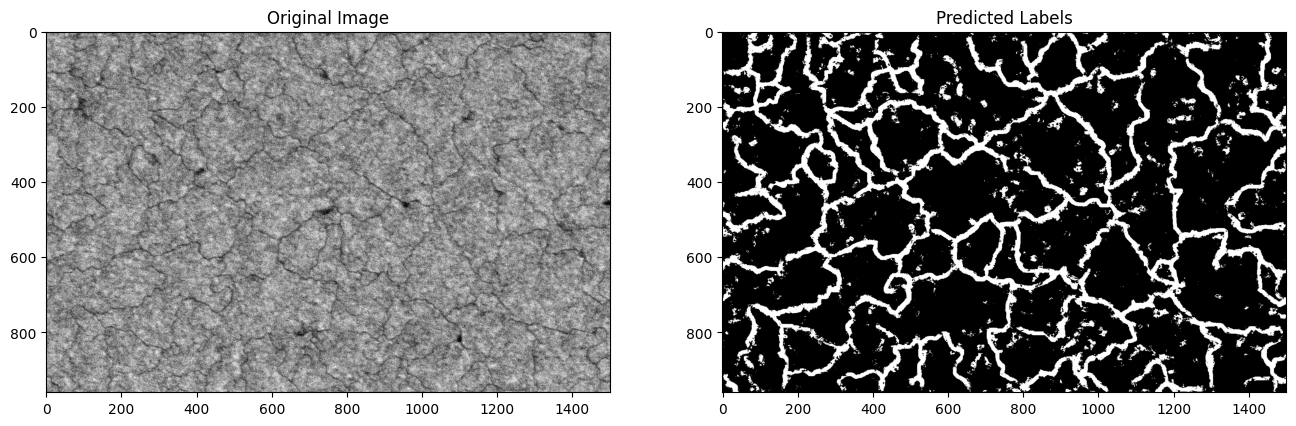

In [27]:

# Display the predicted labels with original test image, sub plot
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(predicted_labels, cmap='gray')
plt.title('Predicted Labels')
plt.show()




In [28]:
# Create output path (with proper naming)
output_filename = image_filename + '_predict_GBs.tif'  # Better naming convention
output_path = os.path.join(image_dir, output_filename)

# Save the predicted labels to the output path
io.imsave(output_path, predicted_labels.astype(np.uint8)) 

print(f"Saved prediction to: {output_path}")


Saved prediction to: ..\image_files\AG103-A\AG103-A-50K-002_predict_GBs.tif


c:\Users\1000312667\Documents\BSSEM- Mo HS grainsize\sem_seg\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: ..\image_files\AG103-A\AG103-A-50K-002_predict_GBs.tif is a low contrast image
  return func(*args, **kwargs)
